<a href="https://colab.research.google.com/github/omaziz22/KuliahDataMining/blob/main/K_NN_Prediksi_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

In [8]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pd.read_csv('stroke.csv')

In [14]:
df.head

<bound method NDFrame.head of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [16]:
df.describe

<bound method NDFrame.describe of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [17]:
df.info

<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

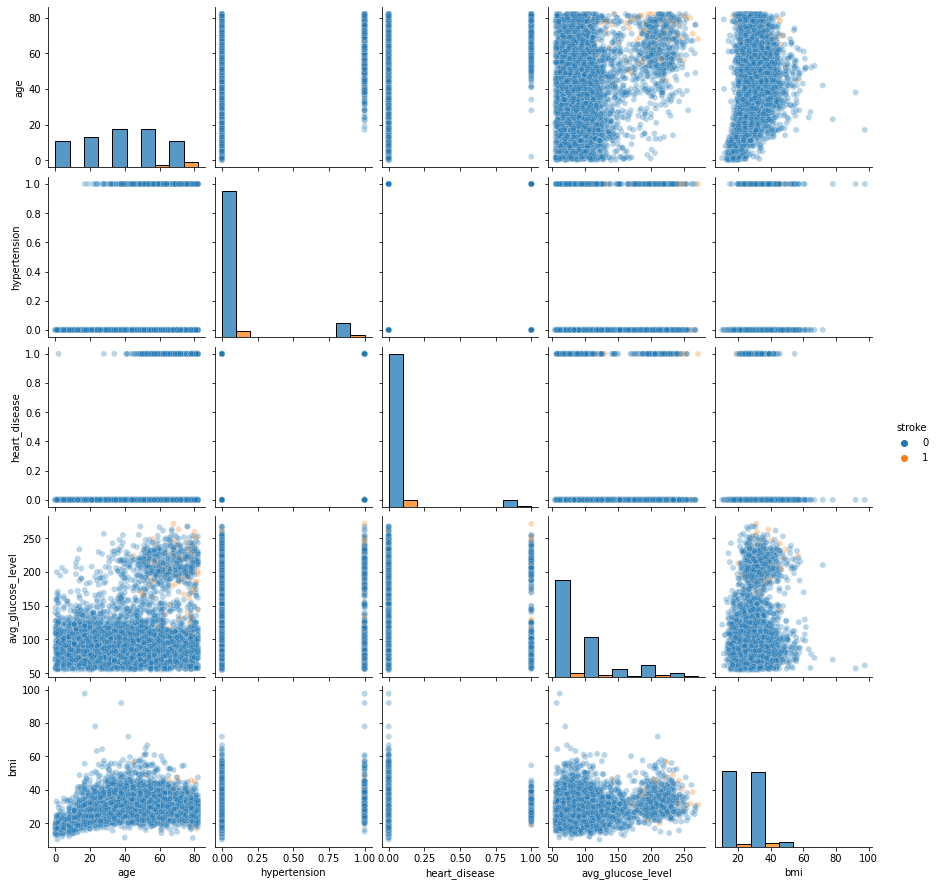

In [40]:
sns.pairplot(df.drop('id',axis=1),hue="stroke",
             plot_kws={'alpha':0.3},diag_kind='hist',
             diag_kws={'multiple':'dodge','bins':5})

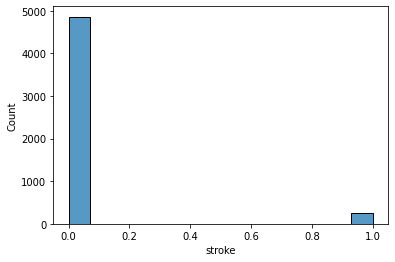

In [22]:
sns.histplot(df['stroke'])

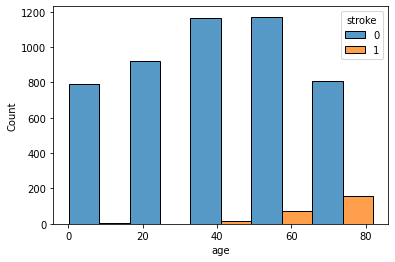

In [25]:
g=sns.histplot(x='age',hue='stroke', 
               data=df,bins=5,multiple='dodge')

In [26]:
def age_split(col):
    age = col
    if age<=18 :
        return '1'
    elif 18<age<=30 :
        return '2'
    elif 30<age<=40 :
        return '3'    
    elif 40<age<=50 :
        return '4'
    elif 50<age<=60 :
        return '5'
    elif 60<age<=85:
        return '6'

In [39]:
df['Age_Category'] = df['age'].apply(age_split)
age_2 = pd.DataFrame(df.groupby('Age_Category')['stroke'].value_counts())
age_2['proportion'] = round(age_2['stroke']/df.groupby('Age_Category')['id'].count(),4)
age_2

stroke  proportion
Age_Category stroke                    
1            0          914      0.9978
             1            2      0.0022
2            0          654      1.0000
3            0          668      0.9911
             1            6      0.0089
4            0          724      0.9797
             1           15      0.0203
5            0          774      0.9405
             1           49      0.0595
6            0         1127      0.8643
             1          177      0.1357

Text(0.5, 1.0, 'Proporsi stroke berdasarkan usia')

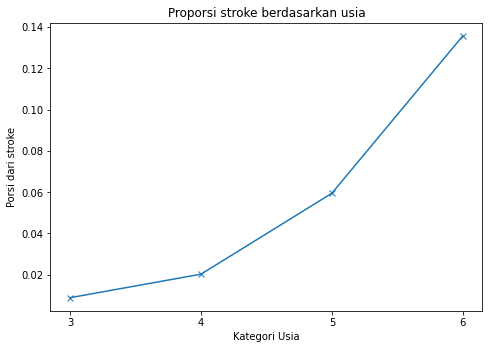

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(['3','4','5','6'],
        age_2[(age_2.index.get_level_values(1)==1)&
              (age_2.index.get_level_values(0)!='1')]['proportion'],
        marker='x')
plt.xlabel('Kategori Usia')
plt.ylabel('Porsi dari stroke')
plt.title('Proporsi stroke berdasarkan usia')

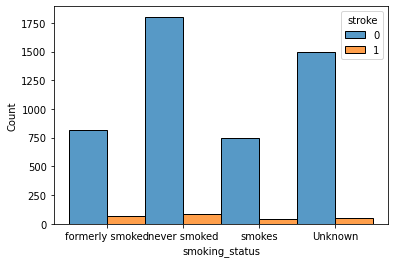

In [31]:
sns.histplot(x='smoking_status',
             data=df,hue='stroke',multiple='dodge')

In [35]:
smoke_ =  pd.DataFrame(df.groupby('smoking_status')
['stroke'].value_counts())
smoke_['proportion'] = smoke_['stroke']/df.groupby('smoking_status')['id'].count()
smoke_

stroke  proportion
smoking_status  stroke                    
Unknown         0         1497    0.969560
                1           47    0.030440
formerly smoked 0          815    0.920904
                1           70    0.079096
never smoked    0         1802    0.952431
                1           90    0.047569
smokes          0          747    0.946768
                1           42    0.053232

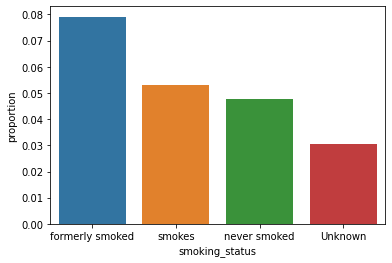

In [45]:
sns.barplot(smoke_.index.get_level_values(0).unique(),
            smoke_[smoke_.index.get_level_values(1)==1]['proportion'],
            order=['formerly smoked','smokes','never smoked','Unknown'])

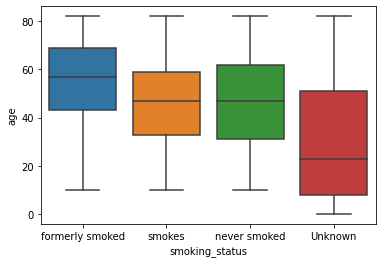

In [46]:
sns.boxplot(x='smoking_status',y='age',
            data=df,order=['formerly smoked','smokes','never smoked','Unknown'])

In [47]:
age_smoke = pd.DataFrame(df.groupby(['Age_Category','smoking_status'])['stroke'].value_counts())
age_smoke['proportion'] = np.round(age_smoke['stroke']/df.groupby(['Age_Category','smoking_status'])['id'].count(),4)
age_smoke

stroke  proportion
Age_Category smoking_status  stroke                    
1            Unknown         0          707      0.9972
                             1            2      0.0028
             formerly smoked 0           28      1.0000
             never smoked    0          165      1.0000
             smokes          0           14      1.0000
2            Unknown         0          150      1.0000
             formerly smoked 0           69      1.0000
             never smoked    0          301      1.0000
             smokes          0          134      1.0000
3            Unknown         0          138      1.0000
             formerly smoked 0           95      0.9794
                             1            2      0.0206
             never smoked    0          292      0.9966
                             1            1      0.0034
             smokes          0          143      0.9795
                             1            3      0.0205
4            Unknown         0          149      0.9868
                             1            2      0.0132
             formerly smoked 0          124      0.9764
                             1            3      0.0236
             never smoked    0          295      0.9768
                             1            7      0.0232
             smokes          0          156      0.9811
                             1            3      0.0189
5            Unknown         0          141      0.9216
                             1           12      0.0784
             formerly smoked 0          177      0.9415
                             1           11      0.0585
             never smoked    0          309      0.9626
                             1           12      0.0374
             smokes          0          147      0.9130
                             1           14      0.0870
6            Unknown         0          212      0.8724
                             1           31      0.1276
             formerly smoked 0          322      0.8564
                             1           54      0.1436
             never smoked    0          440      0.8627
                             1           70      0.1373
             smokes          0          153      0.8743
                             1           22      0.1257

Text(0.5, 1.0, 'Proportion of strokes per age category & smoking status')

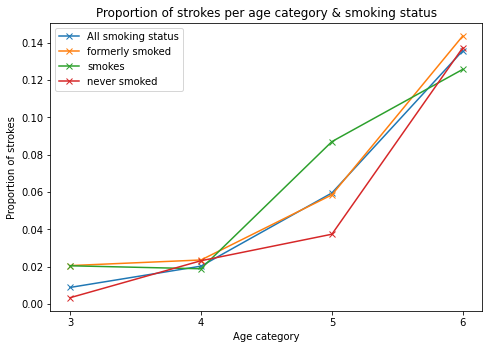

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(['3','4','5','6'],age_2[(age_2.index.get_level_values(1)==1)&(age_2.index.get_level_values(0)!='1')]['proportion'],
        label ='All smoking status',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='formerly smoked')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='formerly smoked',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='smokes')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='smokes',marker='x')
ax.plot(['3','4','5','6'],age_smoke[(age_smoke.index.get_level_values(1)=='never smoked')&(age_smoke.index.get_level_values(2)==1)]['proportion'],
        label ='never smoked',marker='x')
plt.legend()
plt.xlabel('Age category')
plt.ylabel('Proportion of strokes')
plt.title('Proportion of strokes per age category & smoking status')

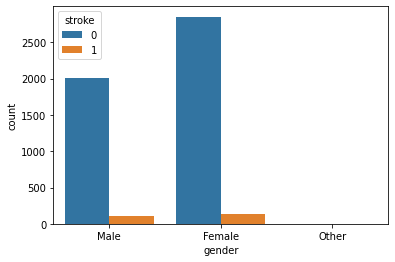

In [49]:
sns.countplot(x='gender',hue='stroke',data=df)

In [51]:
age_disease = pd.DataFrame(df.groupby(['Age_Category','heart_disease','hypertension','stroke'])['id'].count())
age_disease['proportion'] = age_disease['id']/df.groupby(['Age_Category','heart_disease','hypertension'])['id'].count()

In [52]:
age_disease['age']=age_disease.index.get_level_values(0)
age_disease['heart_disease']=age_disease.index.get_level_values(1)
age_disease['hypertension']=age_disease.index.get_level_values(2)
age_disease['stroke']=age_disease.index.get_level_values(3)

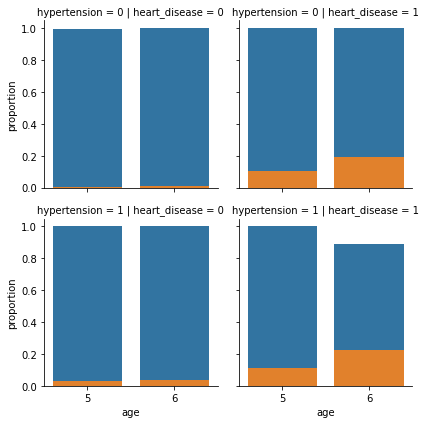

In [53]:
f = sns.FacetGrid(data=age_disease,col='heart_disease',row='hypertension',hue='stroke')
f.map(sns.barplot,'age','proportion')

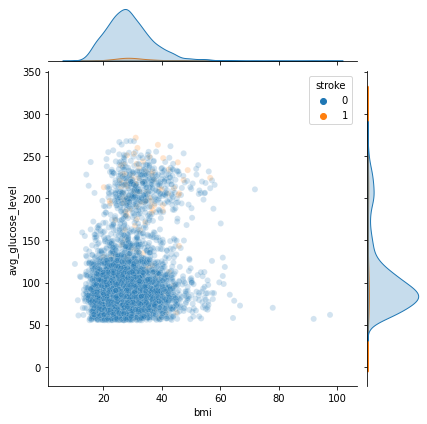

In [54]:
sns.jointplot(x='bmi',y='avg_glucose_level'
,data=df,hue='stroke',alpha=0.2)

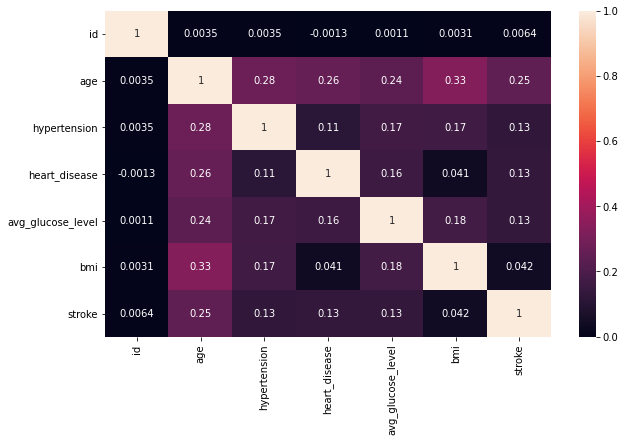

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [56]:
dg = df.groupby(['Age_Category','stroke','hypertension'])['bmi'].mean().reset_index()
dg.head()

,Age_Category,stroke,hypertension,bmi
0,1,0,0,21.619037
1,1,0,1,97.600000
2,1,1,0,30.900000
3,2,0,0,27.977532
4,2,0,1,41.788889


In [58]:
def fill_bmi(cols) :
    global g
    t = cols[3]
    b = cols[0]
    s = cols[1]
    a = cols[2]
    if np.isnan(b)==False :
        return b
    else : 
        return round(float(dg[(dg['stroke']==s) & (dg['Age_Category']==a) & (dg['hypertension']==t)]['bmi']),1)

In [59]:
df['filled_bmi'] = df[['bmi','stroke','Age_Category','hypertension']].apply(fill_bmi,axis=1)

In [60]:
dum1 = pd.get_dummies(df['gender'],drop_first=True)
dum2 = pd.get_dummies(df['ever_married'],drop_first=True)
dum3 = pd.get_dummies(df['work_type'],drop_first=True)
dum4 = pd.get_dummies(df['Residence_type'],drop_first=True)
dum5 = pd.get_dummies(df['smoking_status'],drop_first=True)

In [61]:
df = pd.concat([df,dum1,dum2,dum3,dum4,dum5],axis=1)

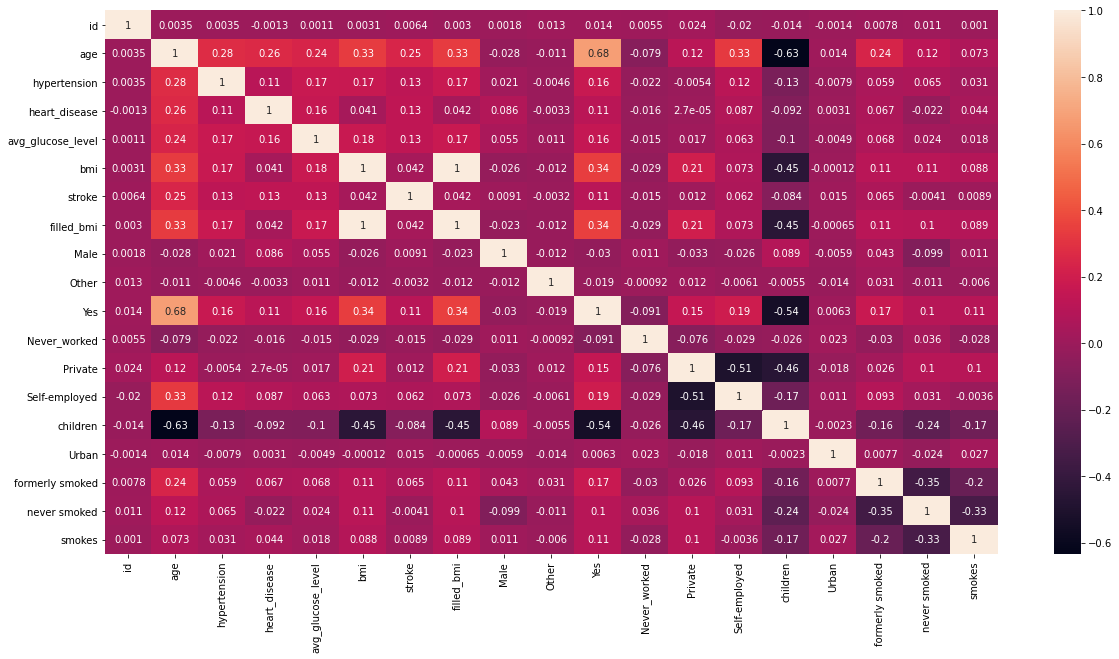

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [64]:
X = df.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status','Age_Category','stroke','bmi'],axis=1)
y = df['stroke']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
smote = SMOTE(sampling_strategy=0.7)
X_trainS , y_trainS = smote.fit_resample(X_train,y_train)

In [68]:
report = pd.DataFrame(index = ['avg accuracy','avg sensitivity','avg precision','avg specifity','avg negative-precision','f-score'])

K = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for i in K :
    
    pipe = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=i))])
    arr = np.zeros(6)

    
    for j in range(5) :
        
        X_fit, X_cv, y_fit, y_cv = train_test_split(X_trainS, y_trainS, test_size=0.16)
        pipe.fit(X_fit,y_fit)
        predictions = pipe.predict(X_cv)
        acc = np.mean(predictions==y_cv) 

        TP = np.sum(np.array(predictions ==1)*np.array(predictions==y_cv))
        TN = np.sum(np.array(predictions ==0)*np.array(predictions==y_cv))
        FP = np.sum(np.array(predictions ==1)*np.array(predictions!=y_cv))
        FN = np.sum(np.array(predictions ==0)*np.array(predictions!=y_cv))
        if TP==0 and FP==0:
            prec = 0
        else : 
            prec = TP/(TP+FP)
        arr = arr + np.array([acc,TP/(TP+FN),prec,TN/(TN+FP),TN/(TN+FN),2*(prec*TP/(TP+FN))/(prec+(TP/(TP+FN)))])
        
    arr = arr/5

    report[str(f'{i}')] = arr

In [69]:
report.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
avg accuracy,0.956587,0.958747,0.936285,0.939309,0.921166,0.914255,0.908207,0.907127,0.893952,0.891577,0.884449,0.874298,0.870410,0.863499,0.863499,0.858099,0.852484,0.866091,0.855940,0.851188
avg sensitivity,0.986832,0.965160,0.980739,0.962469,0.973054,0.937722,0.965081,0.935745,0.955972,0.915923,0.932683,0.897138,0.909363,0.890068,0.913173,0.873771,0.890403,0.880202,0.890631,0.866037
avg precision,0.916327,0.937532,0.879491,0.896880,0.854798,0.862524,0.836765,0.855159,0.813031,0.834896,0.814853,0.819579,0.800514,0.793224,0.786853,0.797932,0.787651,0.809759,0.787610,0.789942
avg specifity,0.934837,0.954117,0.904856,0.923177,0.884970,0.898427,0.868758,0.886401,0.852436,0.874637,0.850385,0.858376,0.843512,0.845805,0.829099,0.847498,0.825147,0.856763,0.831148,0.840865
avg negative-precision,0.989645,0.974722,0.985110,0.972666,0.979373,0.954889,0.972443,0.950677,0.966503,0.937847,0.947044,0.920720,0.931126,0.920696,0.931965,0.906515,0.911665,0.911111,0.916004,0.901164


In [70]:
summary_max = pd.DataFrame([report.max(axis=1),report.idxmax(axis=1)],index=['Value','K value'])
summary_max

,avg accuracy,avg sensitivity,avg precision,avg specifity,avg negative-precision,f-score
Value,0.958747,0.986832,0.937532,0.954117,0.989645,0.951114
K value,2,1,2,2,1,2


In [71]:
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1402   55]
 [  67    9]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1457
           1       0.14      0.12      0.13        76

    accuracy                           0.92      1533
   macro avg       0.55      0.54      0.54      1533
weighted avg       0.91      0.92      0.92      1533



In [72]:
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=2))])
pipe_c.fit(X_trainS,y_trainS)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1410   47]
 [  67    9]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.16      0.12      0.14        76

    accuracy                           0.93      1533
   macro avg       0.56      0.54      0.55      1533
weighted avg       0.92      0.93      0.92      1533



In [73]:
pipe_c = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=1))])
pipe_c.fit(X_train,y_train)
predictions_test = pipe_c.predict(X_test)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1408   49]
 [  67    9]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.16      0.12      0.13        76

    accuracy                           0.92      1533
   macro avg       0.55      0.54      0.55      1533
weighted avg       0.91      0.92      0.92      1533



In [76]:
report2 = pd.DataFrame(index = ['avg accuracy','avg sensitivity','avg precision','avg specifity','avg negative precision','f-score'])
#K values
K = range(1,50)
#Treshhold values
Treshhold = [0.1,0.2,0.3,0.4,0.5]
for i in K :
    for t in Treshhold : 
 
        pipe = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=i))])
        arr = np.zeros(6)

        for j in range(5) :
        
            X_fit, X_cv, y_fit, y_cv = train_test_split(X_train, y_train, test_size=0.16)
            pipe.fit(X_fit,y_fit)
            
            probabilities = pipe.predict_proba((X_cv))
         
            predictions = (probabilities>=t)[:,1].astype(int)
          
            acc = np.mean(predictions==y_cv) 
            TP = np.sum(np.array(predictions ==1)*np.array(predictions==y_cv))
            TN = np.sum(np.array(predictions ==0)*np.array(predictions==y_cv))
            FP = np.sum(np.array(predictions ==1)*np.array(predictions!=y_cv))
            FN = np.sum(np.array(predictions ==0)*np.array(predictions!=y_cv))
            if TP==0 and FP==0:
                prec = 0
            else : 
                prec = TP/(TP+FP)
            arr = arr + np.array([acc,TP/(TP+FN),prec,TN/(TN+FP),TN/(TN+FN),2*(prec*TP/(TP+FN))/(prec+(TP/(TP+FN)))])
        
        arr = arr/5
        report2[str(f'({i},{t})')] = arr

In [77]:
summary_max2 = pd.DataFrame([report2.max(axis=1),report2.idxmax(axis=1)],index=['Value','(K value,threshhold)'])
summary_max2

,avg accuracy,avg sensitivity,avg precision,avg specifity,avg negative precision,f-score
Value,0.961955,0.610103,0.283333,1,0.975339,0.264086
"(K value,threshhold)","(47,0.3)","(9,0.1)","(47,0.2)","(9,0.5)","(37,0.1)","(44,0.1)"


In [78]:
pipe_2 = Pipeline([('Scaler',StandardScaler()),('Classifier',KNeighborsClassifier(n_neighbors=49))])
pipe_2.fit(X_train,y_train)
probabilities_test = pipe_2.predict_proba(X_test)
predictions_test = np.array([(probabilities_test >0.1)[:,1].astype(int)]).reshape(1533,)
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

[[1255  202]
 [  44   32]]


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1457
           1       0.14      0.42      0.21        76

    accuracy                           0.84      1533
   macro avg       0.55      0.64      0.56      1533
weighted avg       0.93      0.84      0.88      1533

